In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]


In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
clf.fit(X_train, Y_train);

In [7]:
Y_preds = clf.predict(X_test)
Y_preds

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [8]:
clf.score(X_train, Y_train)

1.0

In [9]:
clf.score(X_test, Y_test)

0.8360655737704918

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.89      0.84      0.86        38

    accuracy                           0.84        61
   macro avg       0.82      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [11]:
confusion_matrix(Y_test, Y_preds)

array([[19,  4],
       [ 6, 32]], dtype=int64)

In [12]:
accuracy_score(Y_test, Y_preds)

0.8360655737704918

In [13]:
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100 : .2f}%")

Trying model with 10 estimators
Model accuracy on test set:  70.49%
Trying model with 20 estimators
Model accuracy on test set:  85.25%
Trying model with 30 estimators
Model accuracy on test set:  78.69%
Trying model with 40 estimators
Model accuracy on test set:  81.97%
Trying model with 50 estimators
Model accuracy on test set:  80.33%
Trying model with 60 estimators
Model accuracy on test set:  80.33%
Trying model with 70 estimators
Model accuracy on test set:  81.97%
Trying model with 80 estimators
Model accuracy on test set:  83.61%
Trying model with 90 estimators
Model accuracy on test set:  80.33%


In [14]:
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [15]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, Y_test)

0.8032786885245902

In [16]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
executable: c:\Users\Rujul\OneDrive - iitgoa.ac.in\Documents\Python Files\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.24.3
        scipy: 1.11.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.2
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\Rujul\OneDrive - iitgoa.ac.in\Documents\Python Files\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 6
threading_layer: intel

       filepath: C:\Users\Rujul\OneDrive - iitgoa.ac.in\Documents\Python Files\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 12


In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [32]:
np.round(X.shape[0]*0.8)

242.0

In [48]:
car_sales = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [49]:
len(car_sales)

1000

In [50]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [60]:
X = car_sales.drop("Price",axis=1)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [61]:
Y = car_sales["Price"]
Y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [92]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X_categorical = transformed_X.toarray()
pd.DataFrame(transformed_X_categorical)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35820.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,215883.0


In [72]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,False,True,False,False,False,False,False,False,True
1,5.0,True,False,False,False,False,True,False,False,False
2,4.0,False,True,False,False,False,False,False,False,True
3,4.0,False,False,False,True,False,False,False,False,True
4,3.0,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4.0,False,False,False,True,True,False,False,False,False
996,3.0,False,False,False,False,False,False,False,False,True
997,4.0,False,False,True,False,False,True,False,False,False
998,4.0,False,True,False,False,False,False,False,False,True


In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(pd.DataFrame(transformed_X_categorical),Y, test_size=0.2,random_state=42)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
Y_train = Y_train.fillna(0)
Y_test = Y_test.fillna(0)

In [122]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.3043739460474394

In [123]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [124]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [125]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [126]:
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing["Price"]

In [127]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
car_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")
car_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]
imputer = ColumnTransformer([("car_imputer",car_imputer,car_features),("door_imputer",door_imputer,door_features),("num_imputer",num_imputer,num_features)])
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [128]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [129]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [133]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X_categorical = transformed_X.toarray()
transformed_X = pd.DataFrame(transformed_X_categorical)
transformed_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


In [135]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)


0.21990196728583944

In [136]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [139]:
housing_df = pd.DataFrame(housing["data"],columns = housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [141]:
housing_df["MedHouseVal"] = housing["target"]
housing_df["target"] = housing["target"]
housing_df = housing_df.drop("MedHouseVal",axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [145]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = housing_df.drop("target",axis=1)
Y = housing_df["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.5758549611440131

In [146]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X = housing_df.drop("target",axis=1)
Y = housing_df["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8065734772187598

In [147]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [150]:
from sklearn.svm import LinearSVC
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = LinearSVC()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8688524590163934

In [151]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426

In [152]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [153]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [154]:
Y_preds = clf.predict(X_test)
np.mean(Y_preds==Y_test)

0.8524590163934426

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_preds)

0.8524590163934426

In [157]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [158]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [159]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, Y_train)
Y_preds = model.predict(X_test)
Y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [160]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_preds)

0.32659871732073664

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426

In [166]:
cross_val_score(clf, X, Y, cv=5)

array([0.86885246, 0.90163934, 0.78688525, 0.86666667, 0.76666667])

In [167]:
np.random.seed(42)
clf_single_score = clf.score(X_test, Y_test)
clf_cross_val_score = np.mean(cross_val_score(clf,X,Y,cv=5))
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [170]:
from sklearn.metrics import roc_curve
clf.fit(X_train, Y_train)
Y_probs = clf.predict_proba(X_test)
Y_probs[:10]

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.16, 0.84],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.24, 0.76],
       [0.32, 0.68],
       [0.07, 0.93],
       [0.99, 0.01],
       [0.  , 1.  ]])

In [171]:
Y_probs_positive = Y_probs[:, 1]
Y_probs_positive[:10]

array([0.06, 0.58, 0.84, 0.5 , 0.75, 0.76, 0.68, 0.93, 0.01, 1.  ])

In [172]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs_positive)
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.08, 0.12, 0.12,
       0.12, 0.12, 0.6 , 0.64, 0.76, 0.88, 0.96, 1.  ])

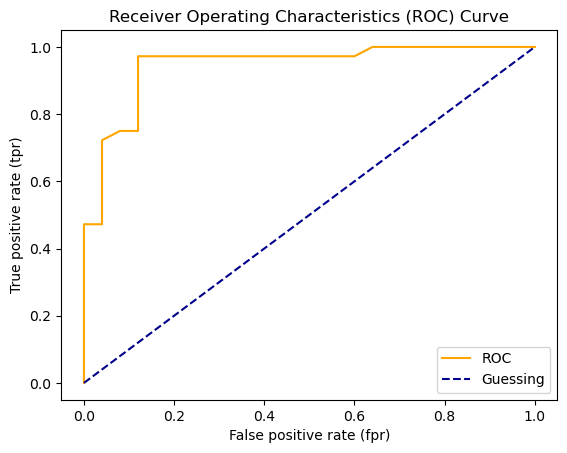

In [174]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--", label="Guessing")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [175]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_probs_positive)

0.9444444444444445

In [192]:
from sklearn.metrics import confusion_matrix
Y_preds = clf.predict(X_test)
confusion_matrix(Y_test, Y_preds)

array([[22,  3],
       [ 5, 31]], dtype=int64)

In [193]:
pd.crosstab(Y_test, Y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,22,3
1,5,31


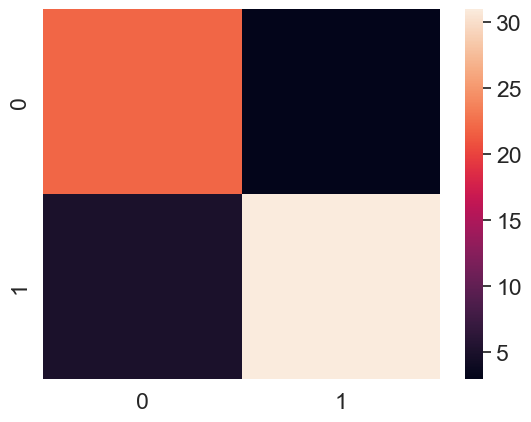

In [194]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_matrix = confusion_matrix(Y_test, Y_preds)
sns.heatmap(conf_matrix);

In [195]:
import sklearn
sklearn.__version__

'1.3.0'

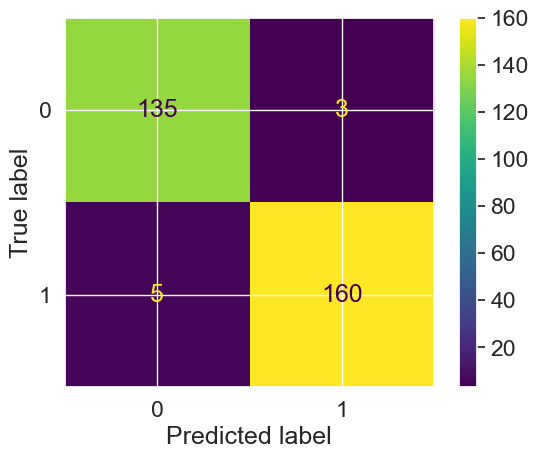

In [196]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=Y);

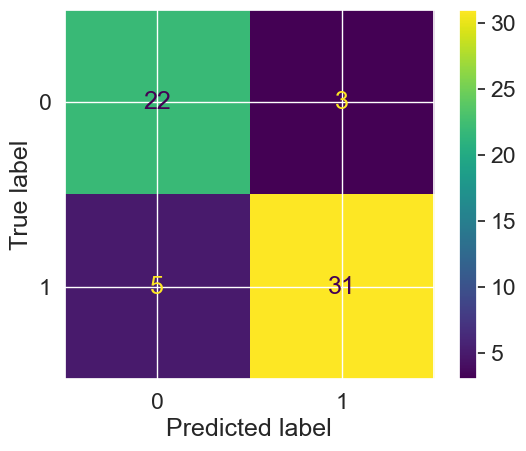

In [197]:
ConfusionMatrixDisplay.from_predictions(y_true=Y_test, y_pred=Y_preds);

In [198]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [204]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target",axis=1)
Y = housing_df["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8065734772187598

In [205]:
from sklearn.metrics import r2_score
Y_test_mean = np.full(len(Y_test),Y_test.mean())
r2_score(y_true = Y_test, y_pred=Y_test_mean)

0.0

In [207]:
from sklearn.metrics import mean_absolute_error
Y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_preds)
mae

0.32659871732073664

In [209]:
df = pd.DataFrame(data={"actual values":Y_test,"predicted values":Y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [211]:
np.abs(df["differences"]).mean()

0.32659871732073664

In [212]:
from sklearn.metrics import mean_squared_error
Y_preds = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_preds)
mse

0.2534678520824551

In [213]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [214]:
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [217]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]
clf = RandomForestClassifier()

In [228]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, Y, cv=5,scoring="f1")#"accuracy"/"precision"/"recall"/"f1"
cv_acc

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [230]:
print(f"The cross-validated f1 score is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated f1 score is: 84.27%


In [231]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target",axis=1)
Y = housing_df["target"]
model = RandomForestRegressor()

In [234]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, Y, cv=2, scoring="neg_mean_squared_error")
np.mean(cv_r2)

-0.5165378325080148

In [235]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
Y_preds = clf.predict(X_test)
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(Y_test, Y_preds)*100:.2f}%")
print(f"Precision: {precision_score(Y_test, Y_preds)*100:.2f}%")
print(f"Recall: {recall_score(Y_test, Y_preds)*100:.2f}%")
print(f"F1 Score: {f1_score(Y_test, Y_preds)*100:.2f}%")

Classifier metrics on the test set:
Accuracy: 80.33%
Precision: 89.47%
Recall: 80.95%
F1 Score: 85.00%


In [239]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, Y_train)
Y_preds = model.predict(X_test)
print("Reggresor metrics on the test set:")
print(f"R2 score: {r2_score(Y_test, Y_preds)*100:.2f}%")
print(f"MSE: {mean_squared_error(Y_test, Y_preds)*100:.2f}%")
print(f"MAE: {mean_absolute_error(Y_test, Y_preds)*100:.2f}%")

Reggresor metrics on the test set:
R2 score: 80.50%
MSE: 25.28%
MAE: 32.38%


In [240]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [242]:
def evaluate_preds(Y_true, Y_preds):
    accuracy = accuracy_score(Y_true, Y_preds)
    precision = precision_score(Y_true, Y_preds)
    recall = recall_score(Y_true, Y_preds)
    f1 = f1_score(Y_true, Y_preds)
    metric_dict ={"accuracy":round(accuracy,2),"precision":round(precision,2),"recall":round(recall,2),"f1":round(f1,2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}%")
    return metric_dict

In [254]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)
X = heart_disease_shuffled.drop("target",axis=1)
Y = heart_disease_shuffled["target"]
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, Y_train = X[:train_split], Y[:train_split]
X_valid, Y_valid = X[train_split:valid_split], Y[train_split:valid_split]
X_test, Y_test = X[valid_split:], Y[valid_split:]
clf = RandomForestClassifier(n_estimators=100, max_depth=10)
clf.fit(X_train,Y_train)
Y_preds = clf.predict(X_valid)
baseline_metrics = evaluate_preds(Y_valid, Y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 81.48%
Recall: 88.00%
F1 Score: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [256]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],"max_depth":[None,5,10,20,30],"max_features":["auto","sqrt"],"min_samples_split":[2,4,6],"min_samples_leaf":[1,2,4]}
np.random.seed(42)
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator = clf, param_distributions=grid, n_iter=10,cv=2,verbose=2)
rs_clf.fit(X_train, Y_train)
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(Y_test, rs_y_preds)
rs_metrics

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100

{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [257]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [258]:
grid_2 = {'n_estimators': [10, 100, 200, 500],'max_depth': [None],'max_features': ['auto', 'sqrt'],'min_samples_split': [6],'min_samples_leaf': [1, 2]}

In [259]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)
gs_clf = GridSearchCV(estimator = clf, param_grid=grid_2, cv=2,verbose=2)
gs_clf.fit(X_train, Y_train)
gs_y_preds = rs_clf.predict(X_test)
gs_metrics = evaluate_preds(Y_test, gs_y_preds)
gs_metrics

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_

{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

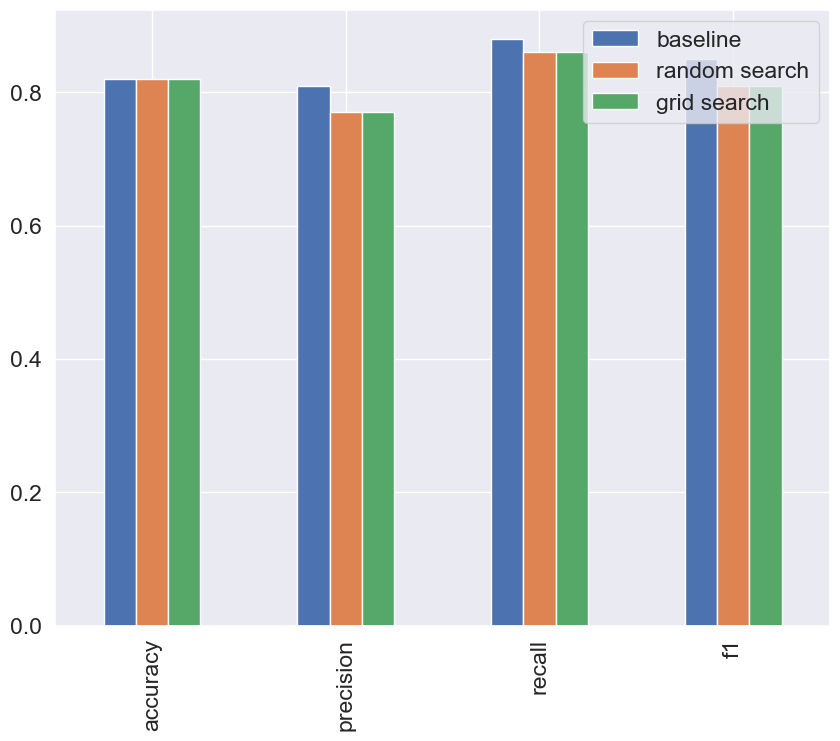

In [260]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,"random search":rs_metrics,"grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

In [261]:
import pickle
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [264]:
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [265]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(Y_test, pickle_y_preds)

Accuracy: 80.33%
Precision: 75.00%
Recall: 85.71%
F1 Score: 80.00%


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

In [267]:
from joblib import dump, load
dump(gs_clf, filename="gs_random_forest_model_2.pkl");

In [269]:
loaded_joblib_model = load(filename="gs_random_forest_model_2.pkl")

In [270]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(Y_test, joblib_y_preds)

Accuracy: 80.33%
Precision: 75.00%
Recall: 85.71%
F1 Score: 80.00%


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

In [271]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [272]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [275]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
np.random.seed(42)
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant",fill_value="missing")),("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_features = ["Doors"]
door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant",fill_value=4))])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])
preprocessor = ColumnTransformer(transformers=[("car",categorical_transformer,categorical_features),("door",door_transformer,door_features),("num",numeric_transformer,numeric_features)])
model = Pipeline(steps=[("preprocessor",preprocessor),("model",RandomForestRegressor())])
X = data.drop("Price",axis=1)
Y = data["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.22188417408787875

In [282]:
pipe_grid = { "preprocessor__num__imputer__strategy": ["mean","median"], "model__n_estimators": [100, 1000], "model__max_depth": [None, 5], "model__max_features":["sqrt"],"model__min_samples_split":[2,4]}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, Y_train)
gs_model.score(X_test, Y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

0.2970584538514702